1) Tham số hàm nâng cao: mặc định, keyword-only, *args, **kwargs
• Thứ tự tham số (đầy đủ): vị trí / vị trí-hoặc-tên / * (đánh dấu phần chỉ-keyword) / **kwargs.
• *args gom các đối số dư dạng tuple; **kwargs gom theo từ khoá dạng dict. Dùng khi cần API linh hoạt.
def f(a, b=0, *args, scale=1, **kwargs):
# a,b: vị trí hoặc tên; *args: phần dư vị trí; scale: chỉ keyword; **kwargs: dư theo tên
return (a + b + sum(args)) * scale
 
f(1, 2, 3, 4, scale=10) # (1+2+3+4)*10 = 100
f(5, x=1) # TypeError: unexpected keyword 'x' (vì không khai báo trong chữ ký)

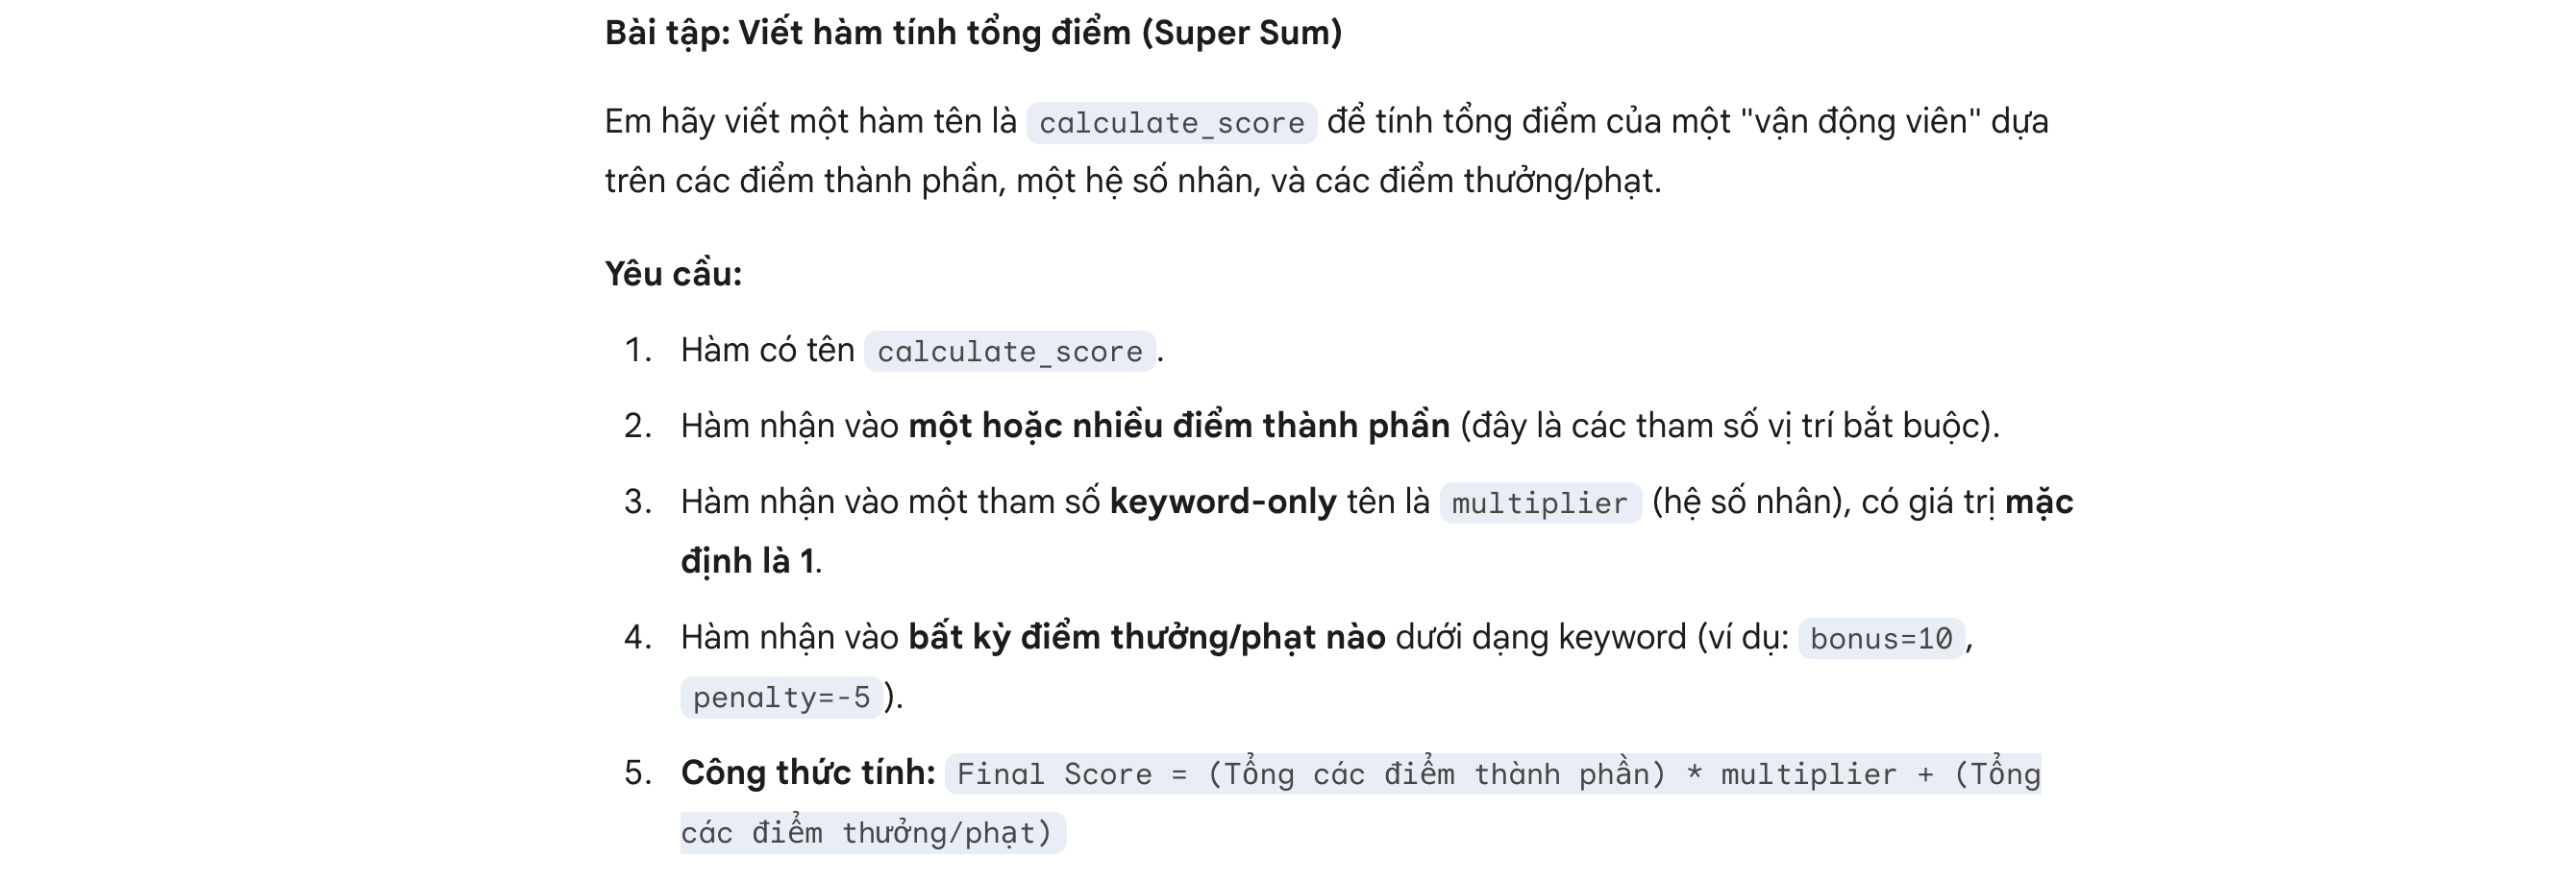

In [ ]:
def calculate_score ( *args, multiplier = 1 , **kwargs  ) :
    return sum(args) * multiplier + sum(kwargs.values())


score1 = calculate_score(10, 20, 5)
print(f"Kết quả 1: {score1}") 

score2 = calculate_score(10, 20, 5, multiplier=2)
print(f"Kết quả 2: {score2}") 

score3 = calculate_score(100, bonus=20, penalty=-10)
print(f"Kết quả 3: {score3}")

score4 = calculate_score(10, 10, multiplier=3, bonus=50, overtime=-5, speed=10)
print(f"Kết quả 4: {score4}") 

score5 = calculate_score(multiplier=2, bonus=5)
print(f"Kết quả 5: {score5}") 

Kết quả 1: 35
Kết quả 2: 70
Kết quả 3: 110
Kết quả 4: 115
Kết quả 5: 5


2) Bẫy 'mutable default' và cách sửa
• Giá trị mặc định được đánh giá MỘT LẦN lúc định nghĩa hàm. Nếu dùng list/dict làm mặc định sẽ bị dùng chung giữa các lần gọi.
• Cách đúng: dùng None làm mặc định, rồi khởi tạo bên trong.
# Sai
def append_item(x, bucket=[]):
bucket.append(x)
return bucket
 
append_item(1) # [1]
append_item(2) # [1, 2] <-- dùng chung list
 
# Đúng
def append_item(x, bucket=None):
if bucket is None:
bucket = []
bucket.append(x)
return bucket

3) lambda / map / filter / reduce; so với comprehension
• lambda tạo hàm ngắn gọn; map áp dụng hàm lên từng phần tử; filter lọc theo predicate; reduce gộp dần (functools).
• Với Pythonic, nên ưu tiên comprehension vì rõ ràng; map/filter hữu ích khi đã có sẵn hàm thuần.
nums = [1,2,3,4,5,6]
# map/filter
evens = list(filter(lambda x: x%2==0, nums)) # [2,4,6]
squares = list(map(lambda x: x*x, nums)) # [1,4,9,16,25,36]
 
# comprehension tương đương
evens2 = [x for x in nums if x%2==0]
squares2 = [x*x for x in nums]
 
# reduce
from functools import reduce
prod = reduce(lambda a,b: a*b, nums, 1) # 720

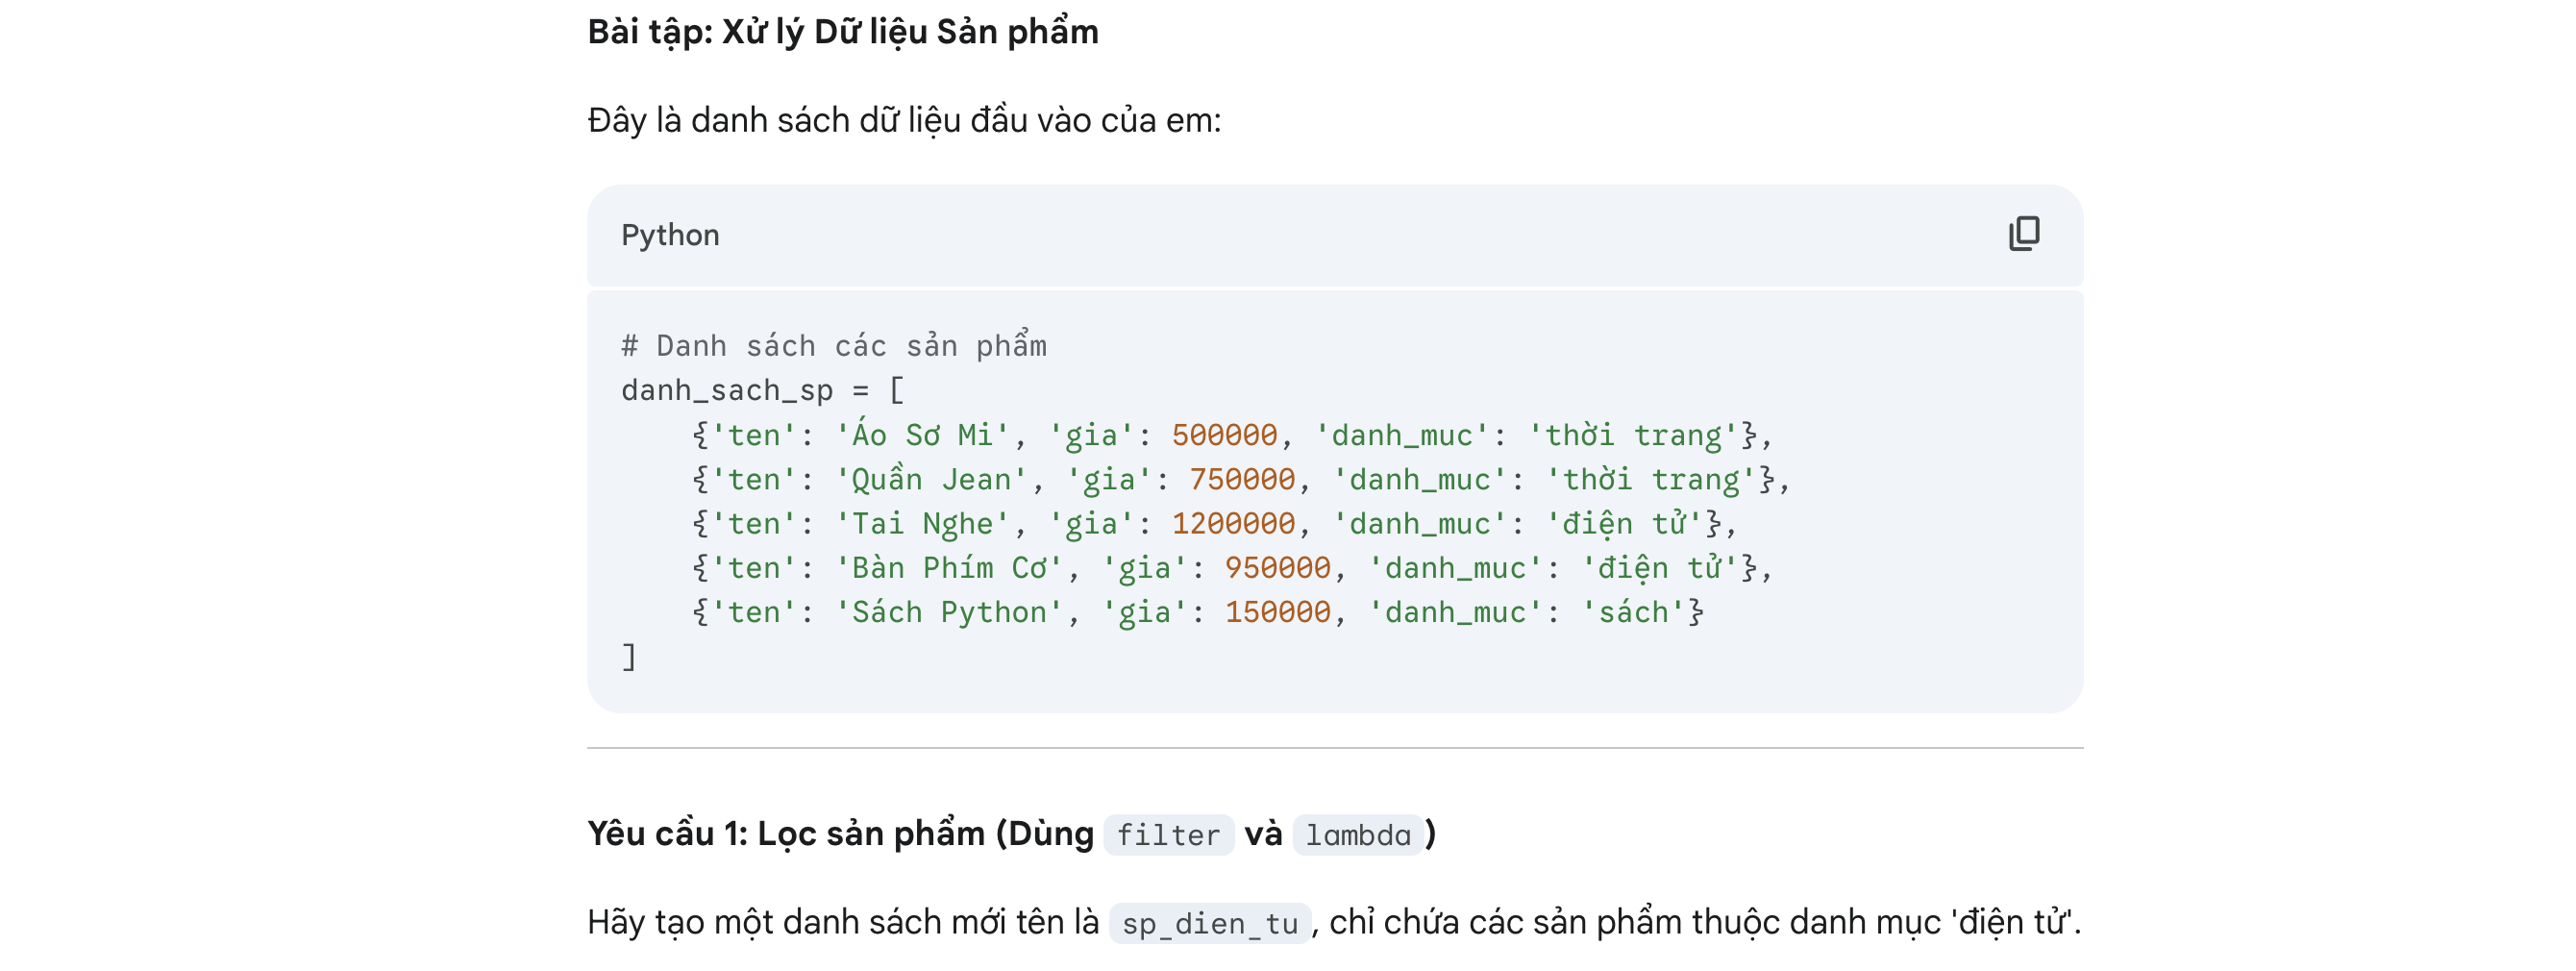
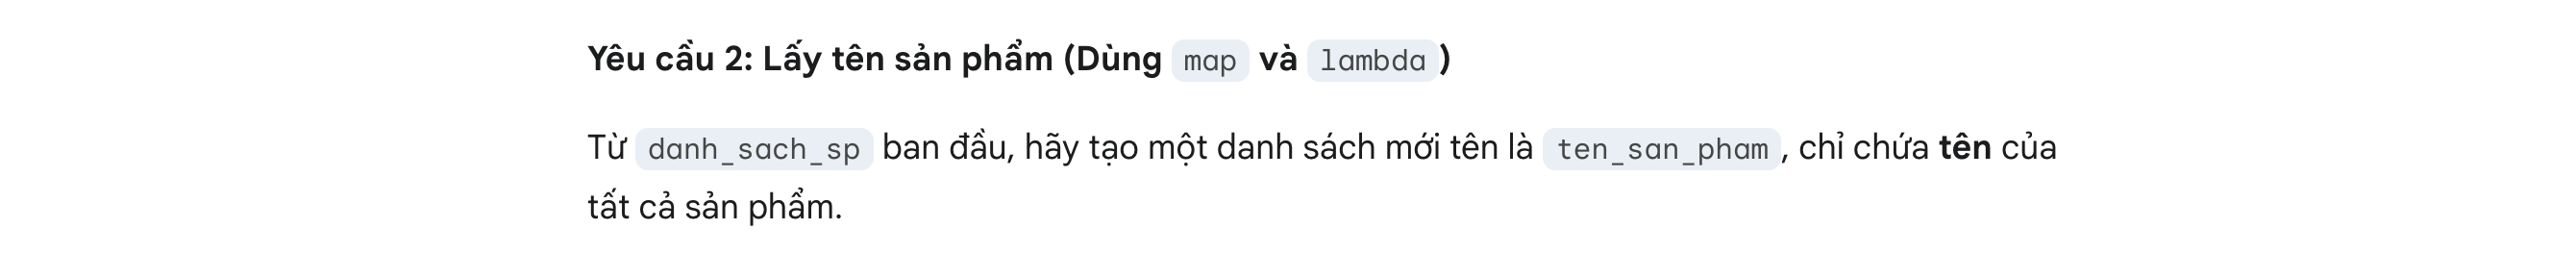
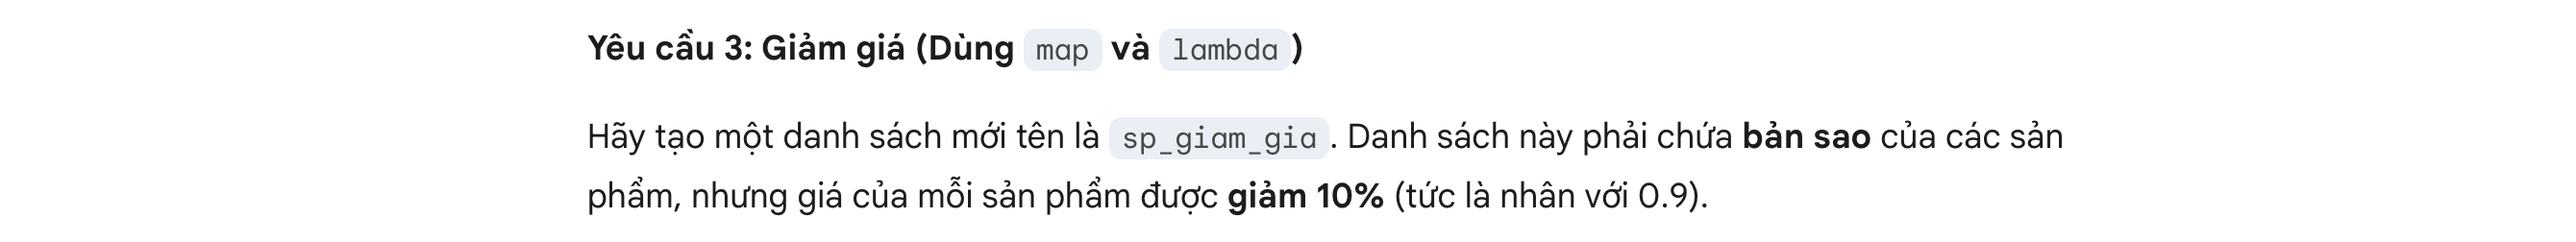
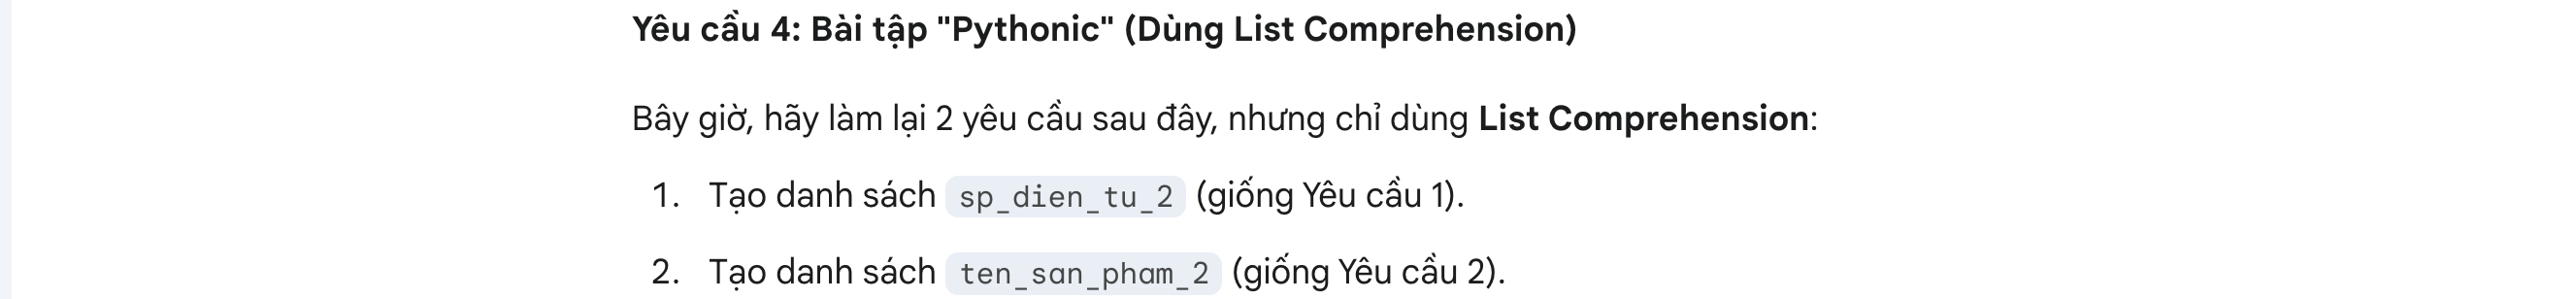
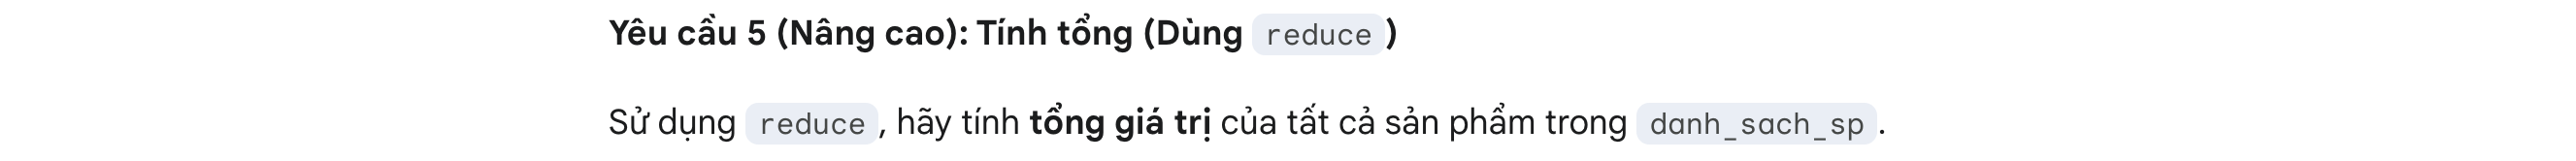

In [4]:
# Danh sách các sản phẩm
danh_sach_sp = [
    {'ten': 'Áo Sơ Mi', 'gia': 500000, 'danh_muc': 'thời trang'},
    {'ten': 'Quần Jean', 'gia': 750000, 'danh_muc': 'thời trang'},
    {'ten': 'Tai Nghe', 'gia': 1200000, 'danh_muc': 'điện tử'},
    {'ten': 'Bàn Phím Cơ', 'gia': 950000, 'danh_muc': 'điện tử'},
    {'ten': 'Sách Python', 'gia': 150000, 'danh_muc': 'sách'}
]

In [8]:
# Câu 1
sp_dien_tu = list(filter(lambda sp: sp["danh_muc"].lower() == "điện tử" , danh_sach_sp))
sp_dien_tu

[{'ten': 'Tai Nghe', 'gia': 1200000, 'danh_muc': 'điện tử'},
 {'ten': 'Bàn Phím Cơ', 'gia': 950000, 'danh_muc': 'điện tử'}]

In [ ]:
# Câu 2:
sp_dien_tu = list(map(lambda sp: sp["ten"].title() , danh_sach_sp))
sp_dien_tu

['Áo Sơ Mi', 'Quần Jean', 'Tai Nghe', 'Bàn Phím Cơ', 'Sách Python']

In [ ]:
# Câu 3: 
sp_dien_tu = list(
    map(
        lambda sp: {
            "ten": sp["ten"],
            "gia": sp["gia"] * 0.9,
            "danh_muc": sp["danh_muc"],
        },
        danh_sach_sp,
    )
)
sp_dien_tu

[{'ten': 'Áo Sơ Mi', 'gia': 450000.0, 'danh_muc': 'thời trang'},
 {'ten': 'Quần Jean', 'gia': 675000.0, 'danh_muc': 'thời trang'},
 {'ten': 'Tai Nghe', 'gia': 1080000.0, 'danh_muc': 'điện tử'},
 {'ten': 'Bàn Phím Cơ', 'gia': 855000.0, 'danh_muc': 'điện tử'},
 {'ten': 'Sách Python', 'gia': 135000.0, 'danh_muc': 'sách'}]

In [16]:
sp_dien_tu = [sp for sp in danh_sach_sp if sp["danh_muc"].lower() == "điện tử" ] 
print(sp_dien_tu)
# Câu 2:
sp_dien_tu = [ sp["ten"].title() for sp in danh_sach_sp ]
print(sp_dien_tu)



[{'ten': 'Tai Nghe', 'gia': 1200000, 'danh_muc': 'điện tử'}, {'ten': 'Bàn Phím Cơ', 'gia': 950000, 'danh_muc': 'điện tử'}]
['Áo Sơ Mi', 'Quần Jean', 'Tai Nghe', 'Bàn Phím Cơ', 'Sách Python']


In [22]:
from functools import reduce
total = reduce(lambda cur,sp: sp["gia"] + cur ,danh_sach_sp , 0)
total


3550000

4) Generator & biểu thức generator (lười)
• yield tạo generator giúp duyệt từng phần, tiết kiệm bộ nhớ. Biểu thức (x for x in seq) là dạng rút gọn.
def upto(n):
i = 0
while i <= n:
yield i
i += 1
 
g = upto(3) # <generator>
list(g) # [0,1,2,3]
sum(x*x for x in range(1,1_000_001)) # tính lười, không tạo list trung gian

In [5]:
danh_sach_lop = [
    {'id': 'sv001', 'ten': 'An', 'diem': [8, 7.5, 9]},
    {'id': 'sv002', 'ten': 'Bình', 'diem': [5, 6, 7.5, 5.5]},
    {'id': 'sv003', 'ten': 'Cường', 'diem': [9, 9, 8.5, 10]},
    {'id': 'sv004', 'ten': 'Dũng', 'diem': [4, 5, 4.5, 6]},
    {'id': 'sv005', 'ten': 'Hương', 'diem': []} # Sinh viên chưa có điểm
]

# Yêu cầu 1: Những điểm làm rất tốt (Ưu điểm)
def tinh_dtb_linh_hoat(scores,**kwargs):
    total = ( (sum(scores) ) / len(scores) ) + sum(kwargs.values()) if len(scores) != 0 else sum(kwargs.values())
    return round(total, 2) if total <= 10 else 10

# Yêu cầu 2: Viết hàm loc_sinh_vien (Sử dụng Generator)
def loc_sinh_vien(danh_sach_lop , diem_san):
    return (
        {"ten": sv["ten"], "diem": sum(sv["diem"]) / (len(sv["diem"]) if sv["diem"] != [] else 1)}
        for sv in danh_sach_lop
        if (sum(sv["diem"]) / (len(sv["diem"]) if sv["diem"] != [] else 1) >= diem_san)
    )

# Yêu cầu 3: Áp dụng các hàm và xử lý dữ liệu
# 1
bang_diem_cuoi_cung = [tinh_dtb_linh_hoat(sv['diem'], thuong_du_an=0.5 ) for sv in danh_sach_lop ]
# print(bang_diem_cuoi_cung)

# 2
def kiem_tra_diem_thanh_phan(scores):
    return [score for score in scores if score < 5] == []
sinh_vien_canh_cao = [ sv['ten'] for sv in danh_sach_lop if not kiem_tra_diem_thanh_phan(sv['diem']) ]
# print(sinh_vien_canh_cao)

# 3
sv_dat_hoc_bong = loc_sinh_vien(danh_sach_lop,8.0)
for sv in sv_dat_hoc_bong:
    print(f"{sv['ten']} : {round(sv['diem'],3)}")

An : 8.167
Cường : 9.125


In [6]:
import sys 


296
280
